# **Práctica - Visualización de Datos**

[Victor Sanchez](https://github.com/VicoSan07) <br>
Dataset: [DENUE INEGI](https://www.inegi.org.mx/siscon/)

En esta práctica nos conectaremos a la API del Directorio Estadístico Nacional de Unidades Económicas (DENUE) del INEGI, la cuál contiene información de los establecimientos en territorio nacional. Para tener acceso a la misma, es necesario solicitar un [token](https://www.inegi.org.mx/servicios/api_denue.html) por correo electronico, el cuál será utilizado dentro las urls de consulta que realicemos. Del mismo modo recomiendo conocer el catálogo de claves del INEGI para facilitar la busqueda de entidades, áreas, entre otros elementos a disponer.

En este primer acercamiento, se extraerá la información disponible de todos los establecimientos localizados en Nuevo León, México. Dentro de la URL se puede observar que la [clave](https://www.inegi.org.mx/app/ageeml/#) 19 corresponde a dicho estado. 

In [1]:
#Librerías
import requests
import pandas as pd

#url con token
url = "https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/19/1/100000000/5c492dfe-52d2-4ded-ab96-c05256d53dde"

#Respuesta de la consulta a la API  
respuesta = requests.get(url).json()

#Dataframe
df_nl = pd.DataFrame(respuesta)

In [82]:
df_nl.head()

CLEE       Id  \
0  19026522460000152000037857S8  9047228   
1  19039522460000922000037857S7  8539497   
2  19025433510000021000007244S7  8390152   
3  19039237112000076001000000U5  6147957   
4  19039434225002991000000000U4  8635155   

                                            Nombre  \
0   SECURITY FINANCE CASA DE PRESTAMOS MONTERREY 1   
1   SECURITY FINANCE CASA DE PRESTAMOS MONTERREY 2   
2                                TRANE MULTIPARQUE   
3                                                "   
4                                       @ COMPUTER   

                                  Razon_social  \
0       CASA DE AMIGOS DE MEXICO S DE RL DE CV   
1       CASA DE AMIGOS DE MEXICO S DE RL DE CV   
2                               TRANE SA DE CV   
3  CONSTRUCCIONES Y TERRACERIAS CROMO SA DE CV   
4                                                

                                     Clase_actividad           Estrato  \
0          Sociedades financieras de objeto múltiple    0 a 5 personas   
1          Sociedades financieras de objeto múltiple    0 a 5 personas   
2  Comercio al por mayor de electrodomésticos men...  11 a 30 personas   
3       Preparación de terrenos para la construcción  11 a 30 personas   
4  Comercio al por mayor de equipo y material elé...    0 a 5 personas   

  Tipo_vialidad                      Calle Num_Exterior Num_Interior  ...  \
0         CALLE                PABLO LIBAS          405               ...   
1       AVENIDA            ABRAHAM LINCOLN         5252            0  ...   
2         CALLE                MULTIPARQUE            0            0  ...   
3         CALLE                     AYUTLA         1302               ...   
4         CALLE  MIGUEL HIDALGO Y COSTILLA          122               ...   

            Sitio_internet  Tipo       Longitud      Latitud  \
0  WWW.SECURITYFINANCE.COM  Fijo  -100.18943804  25.65835559   
1  WWW.SECURITYFINANCE.COM  Fijo  -100.36615371  25.72536470   
2                           Fijo  -100.23764761  25.88187661   
3                           Fijo  -100.30166963  25.66079523   
4                           Fijo  -100.31611447  25.66722379   

   tipo_corredor_industrial nom_corredor_industrial numero_local  \
0                                                                  
1  CENTRO Y PLAZA COMERCIAL                   ADANA                
2                                                                  
3                                                                  
4  CENTRO Y PLAZA COMERCIAL          PLAZA DE AUDIO    102 Y 103   

                                              Sitio        Municipio  \
0                                         GUADALUPE        Guadalupe   
1                                         MONTERREY        Monterrey   
2  PARQUE TECNOLÓGICO MONTERREY [PARQUE INDUSTRIAL]   General Zuazua   
3                                         MONTERREY        Monterrey   
4                                         MONTERREY        Monterrey   

           Estado  
0   NUEVO LEÓN     
1   NUEVO LEÓN     
2   NUEVO LEÓN     
3   NUEVO LEÓN     
4   NUEVO LEÓN     

[5 rows x 25 columns]

A partir de aquí, se pueden analizar distintas vertientes respecto a los establecimientos, entre ellas:

1. Conocer el número de establecimientos por municipio a manera de reconocer en que municipios existe mayor actividad económica para el estado.
2. El tamaño de los establecimientos.
3. La actividad económica que más predomina en el estado.

## Número de establecimientos por municipio

Respecto a nuestra primera consulta, nos enfrentamos al problema de que las ubicaciones no están agrupadas únicamente por municipio, sino también incluyen información de la colonia o un sitio particular como parte de su ubicación.

In [28]:
ubitotales = df_nl['Ubicacion'].unique()
# Juárez cuenta con dos registros distintos
ubitotales[9:14]

array(['CIUDAD BENITO JUÁREZ, Juárez, NUEVO LEÓN   ',
       'DOCTOR ARROYO, Doctor Arroyo, NUEVO LEÓN   ',
       'CIUDAD APODACA, Apodaca, NUEVO LEÓN   ',
       'CIUDAD SATÉLITE DEL NORTE, Salinas Victoria, NUEVO LEÓN   ',
       'JARDINES DE LA SILLA (JARDINES), Juárez, NUEVO LEÓN   '],
      dtype=object)

Por lo que añadiremos 3 columnas más dividiendo la columna Ubicación por Sitio, Municipio y Estado.

In [ ]:
#Dividimos la columna mediante la función apply filtrando por ","
df_nl[['Sitio','Municipio','Estado']] = df_nl.Ubicacion.apply(
   lambda x: pd.Series(str(x).split(",")))


In [37]:
df_nl[['Sitio','Municipio','Estado']]

Sitio        Municipio  \
0                                              GUADALUPE        Guadalupe   
1                                              MONTERREY        Monterrey   
2       PARQUE TECNOLÓGICO MONTERREY [PARQUE INDUSTRIAL]   General Zuazua   
3                                              MONTERREY        Monterrey   
4                                              MONTERREY        Monterrey   
...                                                  ...              ...   
186267                                         MONTERREY        Monterrey   
186268                                    GENERAL ZUAZUA   General Zuazua   
186269                                         MONTERREY        Monterrey   
186270                                    CIUDAD APODACA          Apodaca   
186271                                    CIUDAD APODACA          Apodaca   

                Estado  
0        NUEVO LEÓN     
1        NUEVO LEÓN     
2        NUEVO LEÓN     
3        NUEVO LEÓN     
4        NUEVO LEÓN     
...                ...  
186267   NUEVO LEÓN     
186268   NUEVO LEÓN     
186269   NUEVO LEÓN     
186270   NUEVO LEÓN     
186271   NUEVO LEÓN     

[186272 rows x 3 columns]

In [65]:
# Conteo de establecimientos por municipio
df_nl_municipios = pd.DataFrame(df_nl['Municipio'].value_counts())
df_nl_municipios = df_nl_municipios.reset_index()
df_nl_municipios.columns = ['Municipio', 'Establecimientos']
# Agregamos porcentaje del total
df_nl_municipios['Porcentaje'] = df_nl_municipios['Establecimientos']/sum(df_nl_municipios['Establecimientos'])
# Y suma acumulada
df_nl_municipios['Suma Porcentaje'] = df_nl_municipios['Porcentaje'].cumsum()
df_nl_municipios.head(8)

Municipio  Establecimientos  Porcentaje  Suma Porcentaje
0                  Monterrey             62069    0.333217         0.333217
1                  Guadalupe             23579    0.126584         0.459801
2   San Nicolás de los Garza             16469    0.088414         0.548214
3                    Apodaca             15441    0.082895         0.631109
4           General Escobedo             11892    0.063842         0.694951
5     San Pedro Garza García              9017    0.048408         0.743359
6             Santa Catarina              7968    0.042776         0.786135
7                     Juárez              7612    0.040865         0.827000

Mostrar la información de los 51 municipios mediante un gráfico de barras o de pastel no sería lo ideal, ya que como vemos, alrededor de más de 40 municipios tienen una participación de establecimientos por debajo del 2%, es por ello que tomaremos un top predeterminado de 8 municipios y el resto de ellos lo agruparemos en una sola clase.

In [80]:
dfotros = pd.DataFrame({'Municipio': ['Otros'],
                    'Establecimientos': [int(df_nl_municipios.loc[8:,['Establecimientos']].sum())],
                    'Porcentaje':[float(df_nl_municipios.loc[8:,['Porcentaje']].sum())],
                    'Suma Porcentaje':[1]})

df_nl_municipios2 = pd.concat([df_nl_municipios[:8], dfotros]).reset_index(drop=True)
df_nl_municipios2

Municipio  Establecimientos  Porcentaje  Suma Porcentaje
0                  Monterrey             62069    0.333217         0.333217
1                  Guadalupe             23579    0.126584         0.459801
2   San Nicolás de los Garza             16469    0.088414         0.548214
3                    Apodaca             15441    0.082895         0.631109
4           General Escobedo             11892    0.063842         0.694951
5     San Pedro Garza García              9017    0.048408         0.743359
6             Santa Catarina              7968    0.042776         0.786135
7                     Juárez              7612    0.040865         0.827000
8                      Otros             32225    0.173000         1.000000

Comencemos creando un gráfico de barras mediante [plotly](https://plotly.com/python/), la cual nos permite diseñar gráficos dinámicos como veremos a continuación:

In [93]:
import plotly.express as px

fig_municipios1 = px.bar(df_nl_municipios2, x = 'Municipio', y = 'Establecimientos',
             color = 'Municipio')
fig_municipios1.update_traces(marker_line_color = 'black',
                  marker_line_width = 2, opacity = 1)
fig_municipios1.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(0,0,0,0)'
})
fig_municipios1.update_xaxes(visible=False, showticklabels=False)

fig_municipios1.show()

A tráves de este primer gráfico logramos observar como en la denominada [área metropolitana de Nuevo León](https://www.nl.gob.mx/paginas-especiales/municipios-del-estado-de-nuevo-leon-region-metropolitana) predomina la actividad económica por establecimientos, siendo el municipio de Monterrey el de mayor participación, acaparando 33.3% de los establecimientos totales en la región, como podemos ver a continuación.

In [91]:
fig_municipios2 = px.pie(df_nl_municipios2, names = 'Municipio', values = 'Porcentaje')
fig_municipios2.update_traces(marker_line_color = 'black',
                  marker_line_width = 2, opacity = 1)
fig_municipios2.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(0,0,0,0)'
})
fig_municipios2.show()

Otra forma de representar los datos anteriores es mediante un mapa de calor geográfico, para ello utilizaremos [folium](https://python-visualization.github.io/folium/quickstart.html), aunque cabe destacar que con Plotly también es posible realizar gráficos similares como veremos más adelante.

In [100]:
import folium
from folium import plugins

mapa=folium.Map(
# Indicamos localización de Nuevo León
location=[26.602380040940375,-99.99465848159008],
tiles='OpenStreetMap',
# Entre más pequeño el zoom más alejado de la zona
zoom_start=9)
#Heatmap
mapa.add_child(plugins.HeatMap(df_nl[["Latitud", "Longitud"]].values, radius=5))
#Salvar mapa en html
mapa

Nuevamente la conclusión se mantiene: En la zona metropolitana de Nuevo León predominan los establecimientos. Cabe destacar que en la parte visual este tipo de gráficos son más fáciles de interpretar por su geolocalización.

Ya como última forma de visualización podemos utilizar un mapa de burbujas mediante plotly. El problema aquí es que deberemos asignar una latitud y longitud a los municipios, por lo que aquí podríamos tomar distintas soluciones: la más logica es crear un dataframe con las [latitudes y longitudes de los municipios](https://www.coordenadas.com.es/mexico/pueblos-de-nuevo-leon/19/1), aunque en esta ocasión me he decantado por conseguir la moda de las latitudes y longitudes por municipio de nuestro dataframe principal.

In [127]:
# Latitud y longitud de los municipios utilizando la moda como referencia
df_nl_municipios3 = pd.DataFrame(df_nl.groupby('Municipio')[['Latitud','Longitud']].agg(lambda x: pd.Series.mode(x)[0]))
df_nl_municipios3 = df_nl_municipios3.reset_index()
df_nl_municipios3.columns = ['Municipio', 'Latitud','Longitud']
# Merge para agregar latitud y longitud
df_nl_municipios4 = pd.merge(df_nl_municipios, df_nl_municipios3, on='Municipio', how='outer')
df_nl_municipios4.head()

Municipio  Establecimientos  Porcentaje  Suma Porcentaje  \
0                  Monterrey             62069    0.333217         0.333217   
1                  Guadalupe             23579    0.126584         0.459801   
2   San Nicolás de los Garza             16469    0.088414         0.548214   
3                    Apodaca             15441    0.082895         0.631109   
4           General Escobedo             11892    0.063842         0.694951   

       Latitud       Longitud  
0  25.66745461  -100.31570514  
1  25.66527275  -100.16720100  
2  25.71125537  -100.26259214  
3  25.76512052  -100.19212514  
4  25.76673807  -100.30341050

In [128]:
# Seguimos utilizando plotly
# Nota: Las latitudes y longitudes no eran flotantes por lo que fue necesaria su transformación
fig_municipios3 = px.scatter_mapbox(df_nl_municipios4, lat = (df_nl_municipios4.Latitud).apply(lambda x: float(x)), lon = (df_nl_municipios4.Longitud).apply(lambda x: float(x)), size = 'Establecimientos',
                        zoom = 10, mapbox_style = 'open-street-map')                        
fig_municipios3.show()

Este gráfico se ve un poco más vacío que el anterior debido a la distancia que existe entre cada municipio, así como tal vez el tamaño de las burbujas. Aún así, el resultado es el mismo.

## Tamaño de los establecimientos

El tema se complica a partir de ahora, porque analizar el tamaño de los establecimientos se puede realizar de forma general o por municipio. Si tenemos en cuenta que existen 7 tipos de establecimientos y 51 municipios, analizar toda esta información puede representar un problema.

In [141]:
df_nl['Estrato'].unique()

array(['0 a 5 personas', '11 a 30 personas', '6 a 10 personas',
       '101 a 250 personas', '31 a 50 personas', '251 y más personas',
       '51 a 100 personas'], dtype=object)

Sin embargo, existe un tipo de gráfico jerarquico que puede facilitar dicha función, son conocidos como "*Treemaps*" por su nombre en inglés, y como su nombre lo indica, ramifican las diversas categorías de una base de datos con otras subcategorías, como es nuestro caso.

In [139]:
# Creamos un nuevo data frame agrupado por estrato y municipio, que nos brinde el conteo de establecimientos.
df_nl_estratos = df_nl.groupby(['Estrato', 'Municipio'], as_index=False).size()
df_nl_estratos.columns = ['Estrato', 'Municipio','Total']

In [140]:
import plotly.express as px
  
fig = px.treemap(df_nl_estratos, path=['Estrato', 'Municipio'],
                 values='Total',
                 color='Total')
 
fig.show()

Es increible la cantidad de microempresas / micronegocios que existen en el estado, he utilizado el término microempresa de acuerdo a la definición del [Diario Oficial de la Federación](https://www.dof.gob.mx/nota_detalle_popup.php?codigo=4946386). Aunque el resultado era esperado, observamos que alrededor del 70% del total de los establecimientos corresponden a este tipo de establecimientos.

## Actividades económicas del estado

En este último apartado mediante un simple análisis de textos podremos darnos una idea de las actividades económicas que mas prendominan en N.L. Para ello, utilizaremos [Word Cloud](https://amueller.github.io/word_cloud/).

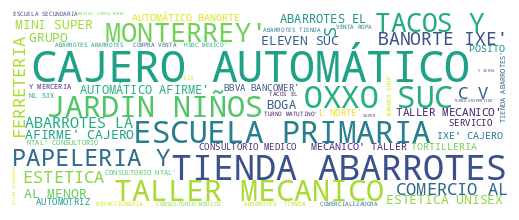

In [156]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

paintcmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
# Eliminamos de los textos conectores básicos u otras palabras que puedan ensuciar el resultado
text = str(list(df_nl['Nombre'])).replace(',', '').replace('NOMBRE', '').replace("DE", '').replace('SA', '').replace('POR', '').replace('CV', '').replace('MTY', '').replace('SIN', '')
# Damos formato al gráfico de salida
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200, max_words = 150).generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Con este último gráfico cerramos el análisis que comenzamos, el cuál fue consistente durante los tres apartados derivado de los negocios minoristas que predominan en este análisis de texto: Tienda, taller mecanico, ferretería, super, tacos, estética, entre otros. En conclusión, Nuevo León es un estado que cuenta con una amplia gama de comercios, la mayoría de ellos centralizados en su área metropolitana y sus alrededores, y de la categoría microempresas / microestablecimientos.